In [2]:
## Final project : Tesla, 비트코인, 삼성전자, Apple 주가 분석 및 예측
## 작성자 : 소프트웨어융합학과 2017111402 안예린

# 0. Load Dataset
import pandas as pd
invest = pd.read_csv("investment.csv")
invest["Date"] = pd.to_datetime(invest["Date"], format = "%Y/%m/%d")

invest['year'] = invest['Date'].dt.year
invest['month'] = invest['Date'].dt.month
invest['day'] = invest['Date'].dt.day


bitcoin = invest.loc[:, ['Date','year','month','day', "bitcoin"]]
samsung = invest.loc[:, ["Date", "Samsung"]]
tesla = invest.loc[:, ["Date", "TESLA"]]
apple = invest.loc[:, ["Date", "Apple"]]

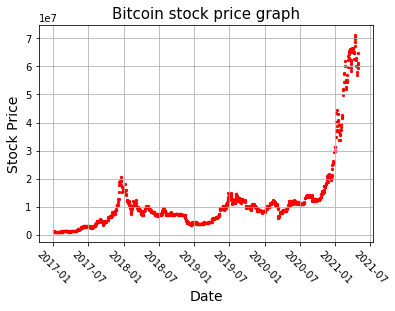

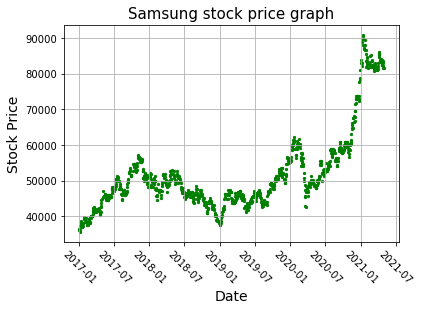

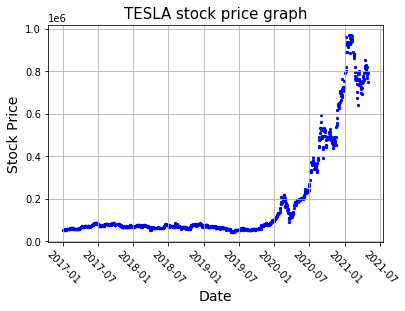

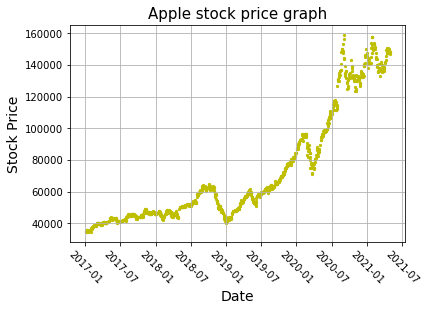

In [3]:
# 1. matplotlib를 사용하여 데이터를 시각화
import matplotlib.pyplot as plt

# 산점도 그래프 그리기 - 비트코인
plt.title("Bitcoin stock price graph", fontsize = 15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.scatter(bitcoin.Date, bitcoin.bitcoin, s=5, color ="r")
plt.grid()
plt.show()

# 산점도 그래프 그리기 - 삼성전자
plt.title("Samsung stock price graph", fontsize = 15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.scatter(samsung.Date, samsung.Samsung, s=5, color ="g")
plt.grid()
plt.show()

# 산점도 그래프 그리기 - Tesla
plt.title("TESLA stock price graph", fontsize = 15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.scatter(tesla.Date, tesla.TESLA, s=5, color ="b")
plt.grid()
plt.show()

# 산점도 그래프 그리기 - Apple
plt.title("Apple stock price graph", fontsize = 15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation = - 45 )
plt.scatter(apple.Date, apple.Apple, s=5, color="y")
plt.grid()
plt.show()

In [4]:
# 2. RNN으로 주식 예측 결과 구현
import tensorflow as tf 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#정규화
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(org_x,x):
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min() 

In [5]:
window_size = 28 # 28일 동안의 주가 데이터에 기반하여 예측
dataDim = 4 # 년도, 월, 날짜, 가격
hiddenDim = 10 #
ourputDim =1
Ir = 0.01
iteration = 500

trainSize = int(len(bitcoin.bitcoin)*0.7) # train : test = 7 : 3

trainSet = bitcoin[0:trainSize]
testSet = bitcoin[trainSize:len(bitcoin.bitcoin)]

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)

# 28일간의 2가지 데이터(날짜, 가격)를 받아와서 
# 바로 다음 날의 가격을 예측하는 모델로 구성
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['year','month','day']
label_cols = ['bitcoin']


# train dataset
trainX = trainSet[feature_cols].astype(float)
trainY = trainSet[label_cols].astype(float)

trainX , trainY = make_dataset(trainX, trainY, window_size)

# test dataset (실제 예측할 데이터)
testX = testSet[feature_cols].astype(float)
testY = testSet[label_cols].astype(float)

testX , testY = make_dataset(testX, testY, window_size)

In [6]:
# 모델 구성 
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='tanh',
                           input_shape=[28,3]))

model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                140       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
44/44 [==============================] - 1s 3ms/step - loss: 0.3917 - mae: 0.5070
Epoch 2/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0677 - mae: 0.2069
Epoch 3/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0531 - mae: 0.1778
Epoch 4/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0454 - mae: 0.1605
Epoch 5/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0398 - mae: 0.1494
Epoch 6/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0365 - mae: 0.1403
Epoch 7/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0335 - mae: 0.1339
Epoch 8/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0315 - mae: 0.1283
Epoch 9/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0304 - mae: 0.1274
Epoch 10/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0292 - mae: 0.1227
Epoch 11/1000
44/44 [============================

44/44 [==============================] - 0s 5ms/step - loss: 0.0056 - mae: 0.0551
Epoch 171/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0058 - mae: 0.0555
Epoch 172/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0060 - mae: 0.0562
Epoch 173/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0541
Epoch 174/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0053 - mae: 0.0532
Epoch 175/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0056 - mae: 0.0550
Epoch 176/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0055 - mae: 0.0536
Epoch 177/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0556
Epoch 178/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0570
Epoch 179/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0052 - mae: 0.0522
Epoch 180/1000
44/44 [=======================

44/44 [==============================] - 0s 4ms/step - loss: 0.0095 - mae: 0.0627
Epoch 339/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0083 - mae: 0.0604
Epoch 340/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0469
Epoch 341/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0454
Epoch 342/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0449
Epoch 343/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0427
Epoch 344/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0466
Epoch 345/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0452
Epoch 346/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0407
Epoch 347/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0402
Epoch 348/1000
44/44 [=======================

44/44 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0384
Epoch 506/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0362
Epoch 507/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0350
Epoch 508/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0345
Epoch 509/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0355
Epoch 510/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0358
Epoch 511/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0024 - mae: 0.0379
Epoch 512/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0348
Epoch 513/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0347
Epoch 514/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0356
Epoch 515/1000
44/44 [=======================

44/44 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0355
Epoch 674/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0356
Epoch 675/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0365
Epoch 676/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0022 - mae: 0.0357
Epoch 677/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0338
Epoch 678/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0364
Epoch 679/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0385
Epoch 680/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0371
Epoch 681/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0366
Epoch 682/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0359
Epoch 683/1000
44/44 [=======================

44/44 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0349
Epoch 842/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0019 - mae: 0.0340
Epoch 843/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0362
Epoch 844/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0329
Epoch 845/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0324
Epoch 846/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0336
Epoch 847/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0363
Epoch 848/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0345
Epoch 849/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0017 - mae: 0.0314
Epoch 850/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0018 - mae: 0.0325
Epoch 851/1000
44/44 [=======================

In [8]:
# 모델 테스트 
res = model.evaluate(testX, testY, batch_size=16)
print("loss",res[0],"mae",res[1])

18/18 [==============================] - 0s 2ms/step - loss: 0.1122 - mae: 0.2166
loss 0.11218344420194626 mae 0.21657662093639374


In [9]:
#7 모델 사용
xhat = testX
yhat = model.predict(xhat)
print("Evaluate : {}".format(np.average((yhat - testY)**2)))

Evaluate : 0.11218343991961731


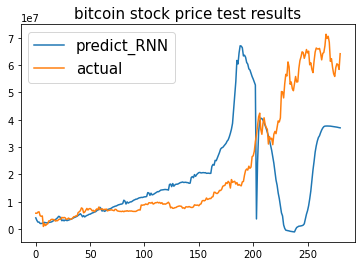

In [10]:
# 원래 값으로 되돌리기 
predict1 = back_MinMax(bitcoin.bitcoin, yhat)
actual = back_MinMax(bitcoin.bitcoin, testY)

plt.figure()
plt.plot(predict1, label = "predict_RNN")
plt.plot(actual,label = "actual")
plt.title("bitcoin stock price test results", fontsize =15)
plt.legend(prop={'size': 15})

In [11]:
predict = pd.read_csv("predict.csv")
predict["Date"] = pd.to_datetime(predict["Date"], format = "%Y/%m/%d")

predict['year'] = predict['Date'].dt.year
predict['month'] = predict['Date'].dt.month
predict['day'] = predict['Date'].dt.day
predict = predict.loc[:, ['Date','year','month','day']]


In [12]:
predict = MinMaxScaler(predict)
predict_x = predict[feature_cols].astype(float)
x = predict["Date"].astype(float)
x

0      0.000000
1      0.001563
2      0.003125
3      0.004687
4      0.006250
         ...   
636    0.993750
637    0.995313
638    0.996875
639    0.998437
640    1.000000
Name: Date, Length: 641, dtype: float64

In [13]:
predict_x , trainY = make_dataset(predict_x, x, window_size)

predict_y = model.predict(predict_x)
print("test_predict", predict_y)
predict_y = back_MinMax(bitcoin.bitcoin, predict_y)

test_predict [[ 0.06458271]
 [ 0.07384267]
 [ 0.07745126]
 [ 0.08115399]
 [ 0.08084884]
 [ 0.06997776]
 [ 0.05680321]
 [ 0.05998862]
 [ 0.04983124]
 [ 0.04943502]
 [ 0.04901567]
 [ 0.0494189 ]
 [ 0.05062684]
 [ 0.05199482]
 [ 0.05371588]
 [ 0.05558601]
 [ 0.05757055]
 [ 0.05960608]
 [ 0.06164218]
 [ 0.06364825]
 [ 0.06560355]
 [ 0.06750078]
 [ 0.06934166]
 [ 0.07113928]
 [ 0.07292432]
 [ 0.07475176]
 [ 0.07669571]
 [ 0.07879335]
 [ 0.08107033]
 [ 0.08370504]
 [ 0.08741084]
 [ 0.09285951]
 [ 0.09536231]
 [ 0.09790041]
 [ 0.10047372]
 [ 0.10665941]
 [ 0.09776156]
 [ 0.08342165]
 [ 0.08985049]
 [ 0.08005849]
 [ 0.08188039]
 [ 0.08315539]
 [ 0.0847733 ]
 [ 0.08713755]
 [ 0.08931917]
 [ 0.09168607]
 [ 0.09398811]
 [ 0.09621234]
 [ 0.09830797]
 [ 0.10023846]
 [ 0.10199028]
 [ 0.10355787]
 [ 0.10494354]
 [ 0.10615126]
 [ 0.10719548]
 [ 0.10813146]
 [ 0.10906649]
 [ 0.11017194]
 [ 0.11144857]
 [ 0.11283352]
 [ 0.11442261]
 [ 0.11666709]
 [ 0.12021342]
 [ 0.12203956]
 [ 0.1238782 ]
 [ 0.1368616

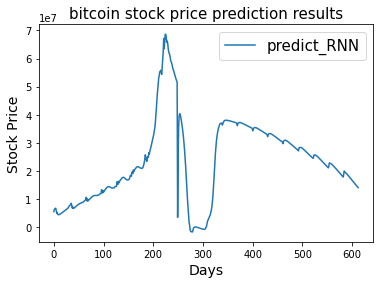

In [14]:
plt.figure()
plt.plot(predict_y, label = "predict_RNN")
plt.title("bitcoin stock price prediction results", fontsize =15)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(prop={'size': 15})